Video Link: https://youtu.be/8LJB9mfMAlg 

# Data Exploration and Preprocessing
Cleaning the data, and tokenizing it. Checking for imbalanced classes and analyzing.

In [23]:
import pandas as pd

# Read in the file
df = pd.read_csv("C:\\Users\\Simrat Khalsa\\Downloads\\Imdb - data_imdb.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
# Check basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['sentiment'].value_counts())


Shape: (50000, 2)

Data Types:
 review       object
sentiment    object
dtype: object

Missing Values:
 review       0
sentiment    0
dtype: int64

Class Distribution:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


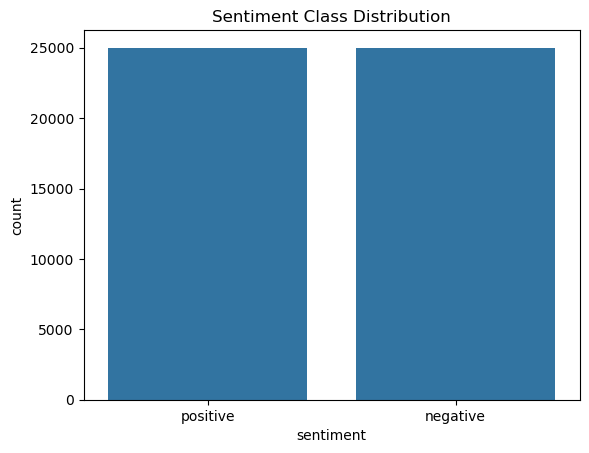

In [10]:
# Check for imbalanced classes
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Class Distribution")
plt.show()


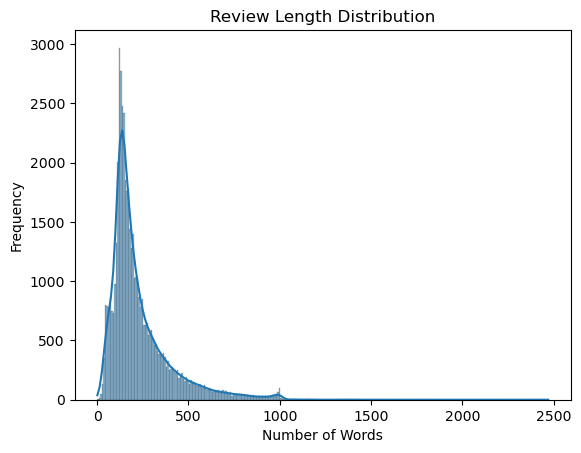

In [11]:
# Analyze review lengths
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

sns.histplot(df['review_length'], kde=True)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [85]:
# Clean the text
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # keep only alphabets and spaces
    return text

df['cleaned_review'] = df['review'].apply(clean_text)


In [52]:
# Remove stopwords and tokenize
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import STOPWORDS

# Default stopwords
custom_stopwords = set(STOPWORDS)

# Adding extra words
extra = ['i', 'other', 'reviewers', 'movie', 'film', 'one', 'get', 'like', 'even', 'would', 'really', 'story', 'also', 'woman', 'fact', 'director', 'people', 'everyone', 'someone', 'life', 'audience']
custom_stopwords.update(extra)

def tokenize_and_filter(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['cleaned_review'].apply(tokenize_and_filter)

print(df['cleaned_review'])



0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: cleaned_review, Length: 50000, dtype: object


In [53]:
# Lemmatization using WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['lemmatized_tokens'] = df['tokens'].apply(lemmatize_tokens)


In [54]:
# Convert tokens back to text for vectorization
df['clean_text_lemmatized'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))


In [90]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['clean_text_lemmatized'])
print(X.shape)

(50000, 5000)


# Training a Logistic Regression Model using TF-IDF features



In [57]:
# Training a Logistic Regression Model using TF-IDF features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

df['sentiment_encoded'] = df['sentiment'].map({'positive': 1, 'negative': 0})

y = df['sentiment_encoded']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
# Evaluate the model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8846

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



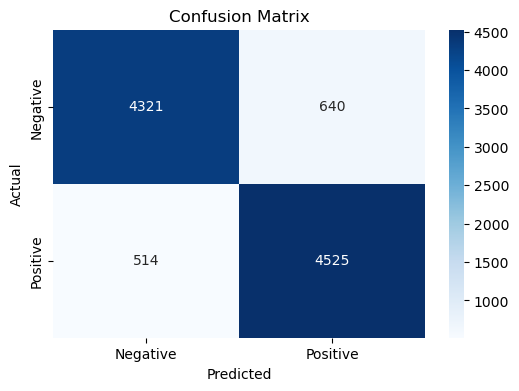

In [59]:
# Visualize a confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In order to make the word cloud more meaningful, I created a custom stopwords for WordCloud, to create more meaningful visualizations.

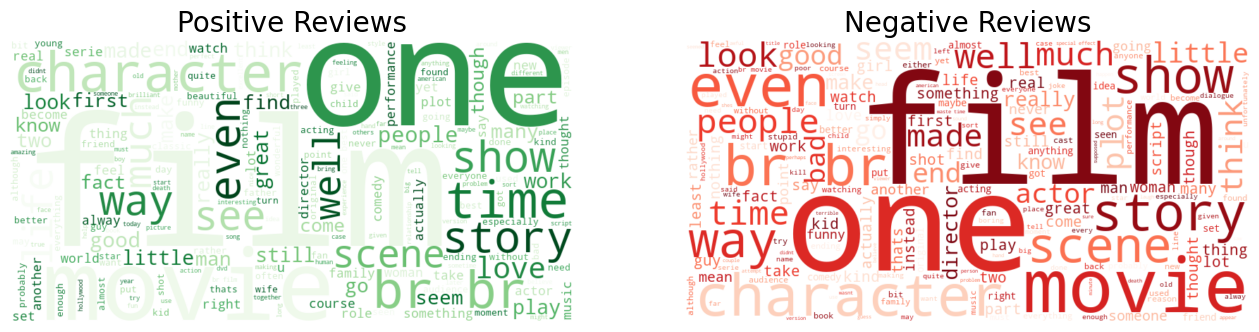

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Separate by sentiment
positive_text = ' '.join(df[df['sentiment'] == 'positive']['clean_text_lemmatized'])
negative_text = ' '.join(df[df['sentiment'] == 'negative']['clean_text_lemmatized'])

# Create word clouds
positive_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
negative_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot them side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Reviews', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Reviews', fontsize=20)
plt.axis('off')

plt.show()



In [63]:
from wordcloud import STOPWORDS

# Default stopwords
custom_stopwords = set(STOPWORDS)

# Adding extra words
extra = ['show', 'see', 'know', 'thing', 'without', 'another', 'make', 'watching', 
         'guy', 'seen', 'wife', 'picture', 'with', 'take', 'never', 'course', 'though',
         'movie', 'film', 'one', 'get', 'like', 'even', 'would', 'really', 'story', 'also',
         'woman', 'fact', 'director', 'people', 'everyone', 'someone', 'life', 'audience',
        'found', 'truly', 'character', 'bad', 'plot', 'actor', 'many', 'performance', 'right', 'going']
custom_stopwords.update(extra)

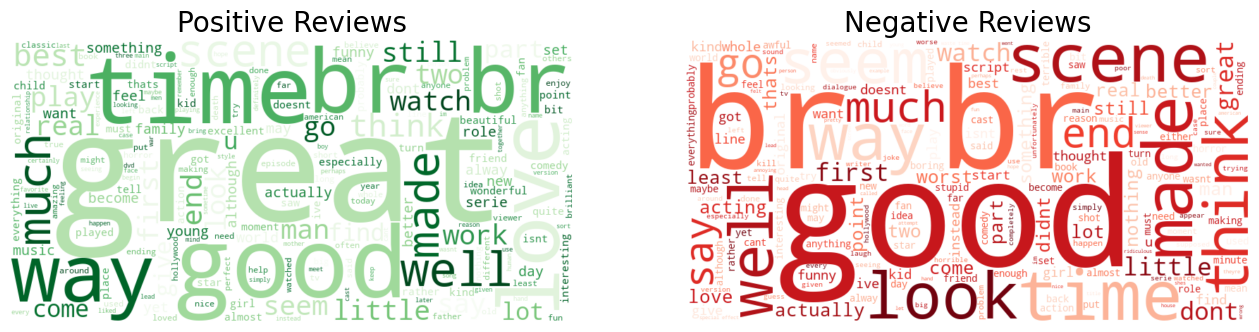

In [64]:
positive_wc = WordCloud(width=800, height=400, 
                        background_color='white', 
                        colormap='Greens', 
                        stopwords=custom_stopwords).generate(positive_text)

negative_wc = WordCloud(width=800, height=400, 
                        background_color='white', 
                        colormap='Reds', 
                        stopwords=custom_stopwords).generate(negative_text)

# Plot them side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Reviews', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Reviews', fontsize=20)
plt.axis('off')

plt.show()




In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit TF-IDF on all your text
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['clean_text_lemmatized'])

# Get the top TF-IDF words
tfidf_words = vectorizer.get_feature_names_out()
filtered_text = ' '.join(tfidf_words)


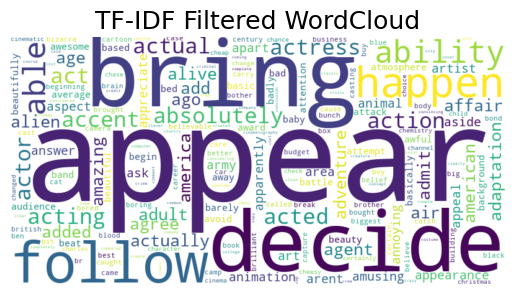

In [68]:
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      stopwords=STOPWORDS).generate(filtered_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("TF-IDF Filtered WordCloud", fontsize=18)
plt.show()


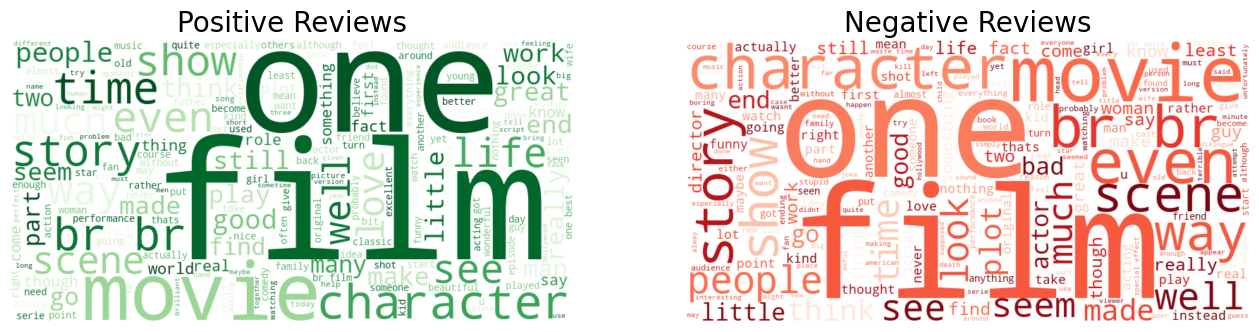

In [69]:
from nltk.corpus import stopwords
from wordcloud import STOPWORDS

nltk_stopwords = set(stopwords.words('english'))
combined_stopwords = STOPWORDS.union(nltk_stopwords)
positive_wc = WordCloud(width=800, height=400, 
                        background_color='white', 
                        colormap='Greens', 
                        stopwords=combined_stopwords).generate(positive_text)

negative_wc = WordCloud(width=800, height=400, 
                        background_color='white', 
                        colormap='Reds', 
                        stopwords=combined_stopwords).generate(negative_text)

# Plot them side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Reviews', fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Reviews', fontsize=20)
plt.axis('off')

plt.show()


# Training with Random Forest Model

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned/lemmatized text
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['clean_text_lemmatized']) 


In [71]:
from sklearn.model_selection import train_test_split

y = df['sentiment']  # assuming sentiment column contains 'positive'/'negative'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8469

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.86      0.85      4961
    positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Confusion Matrix:
 [[4245  716]
 [ 815 4224]]


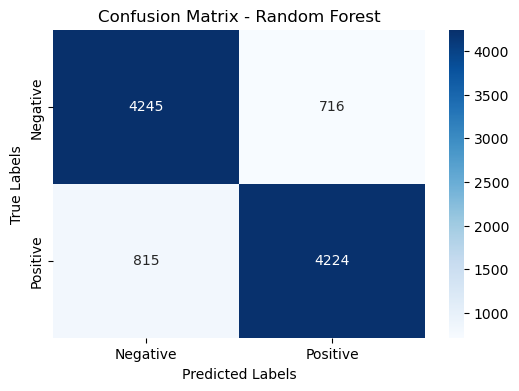

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Negative', 'Positive']

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


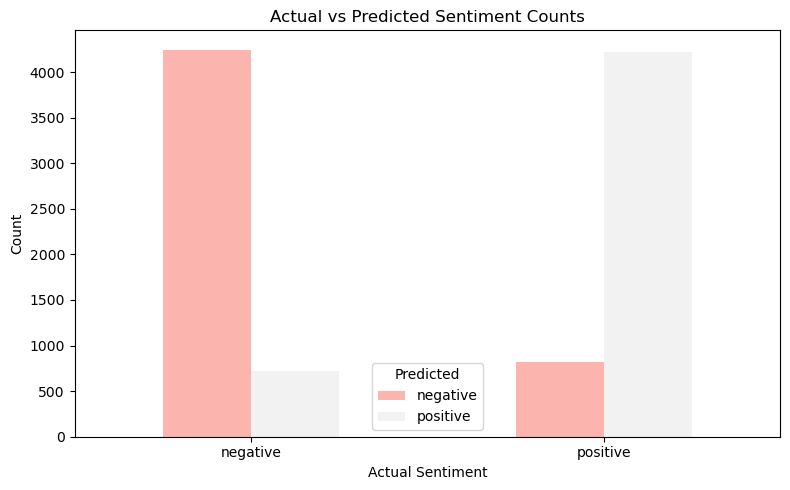

In [75]:
import numpy as np

# Create a DataFrame for actual and predicted
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Count combinations
grouped = compare_df.groupby(['Actual', 'Predicted']).size().unstack()

# Plot grouped bar chart
grouped.plot(kind='bar', stacked=False, colormap='Pastel1', figsize=(8,5))
plt.title('Actual vs Predicted Sentiment Counts')
plt.xlabel('Actual Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Predicted')
plt.tight_layout()
plt.show()


# Training with Naive Bayes Model

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Accuracy: 0.8499

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.84      0.85      4961
    positive       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



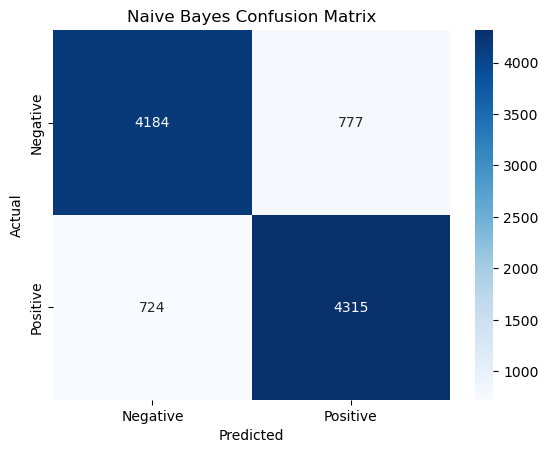

In [77]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


C:\Users\Simrat Khalsa\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


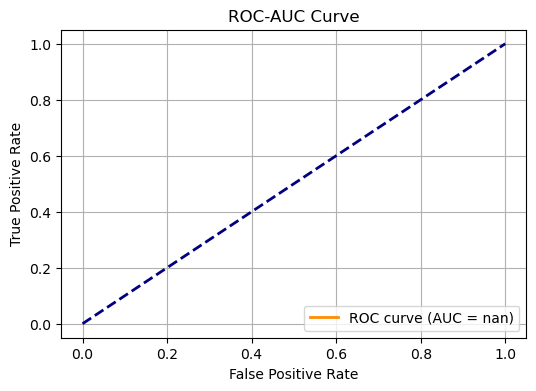

In [78]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize labels if not already
y_test_bin = label_binarize(y_test, classes=[0, 1])
y_proba = nb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Insight Visuals

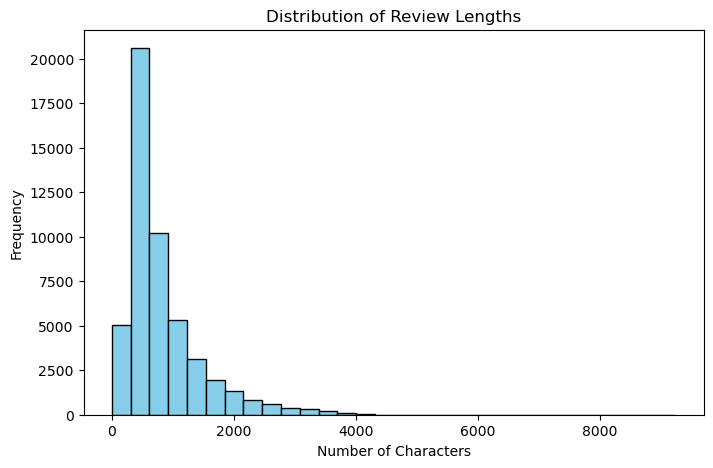

In [80]:
# Reviewing Length Distributions

df['review_length'] = df['clean_text_lemmatized'].apply(len)

plt.figure(figsize=(8, 5))
df['review_length'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [83]:
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # remove punctuation/numbers
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

def predict_sentiment(text, vectorizer, model):
    preprocessed = preprocess_text(text)
    vectorized = vectorizer.transform([preprocessed])
    prediction = model.predict(vectorized)[0]
    proba = model.predict_proba(vectorized)[0].max()
    
    label = "Positive" if prediction == 1 else "Negative"
    return f"Prediction: {label} ({proba*100:.2f}% confidence)"
predict_sentiment("The movie was absolutely horrible!", tfidf_vectorizer, nb_model)


'Prediction: Negative (67.07% confidence)'